# 라이브러리 로딩

In [1]:
import pandas as pd
#notebook을 실행한 브라우저에서 바로 그림을 볼 수 있게 해주는 것
%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#경고 메시지 숨기기
import warnings
warnings.filterwarnings(action="ignore")

# 데이터 불러오기

In [3]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

# 간단한 EDA

In [4]:
#train 데이터의 개형을 살펴폰다. 
#index를 제외하면 총 13개 변수를 가진다.
train.head()

,index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,0,5,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,white
1,1,5,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,red
2,2,5,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,white
3,3,6,7.0,0.210,0.31,6.0,0.046,29.0,108.0,0.99390,3.26,0.50,10.8,white
4,4,6,7.8,0.400,0.26,9.5,0.059,32.0,178.0,0.99550,3.04,0.43,10.9,white


In [5]:
#test 데이터의 개형을 살펴본다.
#index를 제외하면 총 12개의 변수를 가진다.
#train 중 quality 변수가 사라졌다.
test.head()

,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,0,9.0,0.31,0.48,6.6,0.043,11.0,73.0,0.99380,2.90,0.38,11.6,white
1,1,13.3,0.43,0.58,1.9,0.070,15.0,40.0,1.00040,3.06,0.49,9.0,red
2,2,6.5,0.28,0.27,5.2,0.040,44.0,179.0,0.99480,3.19,0.69,9.4,white
3,3,7.2,0.15,0.39,1.8,0.043,21.0,159.0,0.99480,3.52,0.47,10.0,white
4,4,6.8,0.26,0.26,2.0,0.019,23.5,72.0,0.99041,3.16,0.47,11.8,white


In [6]:
#train 데이터의 열 별 정보를 살펴본다.
#결측치는 없다.
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5497 entries, 0 to 5496
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 5497 non-null   int64  
 1   quality               5497 non-null   int64  
 2   fixed acidity         5497 non-null   float64
 3   volatile acidity      5497 non-null   float64
 4   citric acid           5497 non-null   float64
 5   residual sugar        5497 non-null   float64
 6   chlorides             5497 non-null   float64
 7   free sulfur dioxide   5497 non-null   float64
 8   total sulfur dioxide  5497 non-null   float64
 9   density               5497 non-null   float64
 10  pH                    5497 non-null   float64
 11  sulphates             5497 non-null   float64
 12  alcohol               5497 non-null   float64
 13  type                  5497 non-null   object 
dtypes: float64(11), int64(2), object(1)
memory usage: 601.4+ KB


<AxesSubplot:>

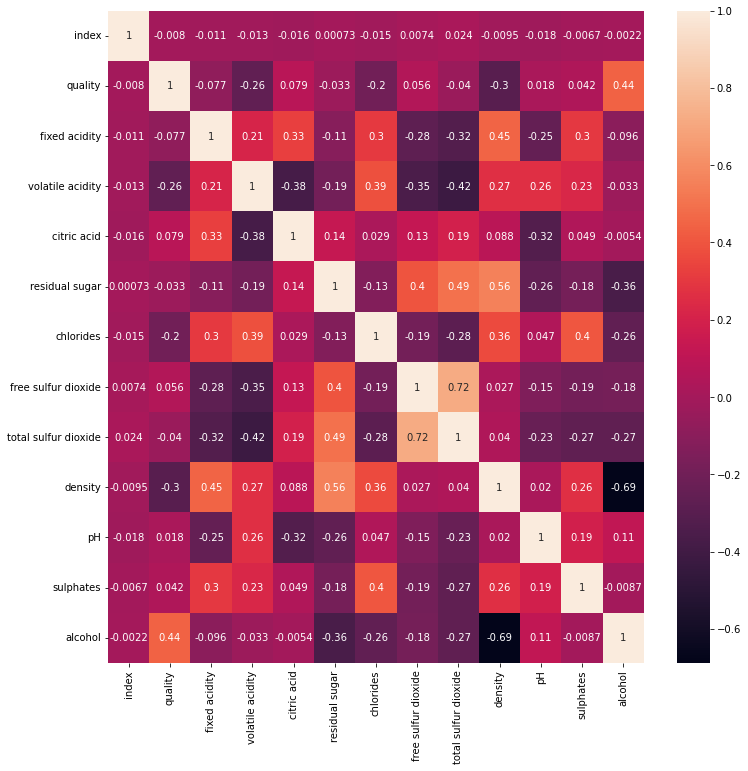

In [7]:
#train의 변수 간 상관관계를 살펴본다.
#plt.figure은 새로운 figure을 생성한다.
plt.figure(figsize=(12,12))
sns.heatmap(data = train.corr(), annot=True)
#annot같은 경우 값 표기 유무를 뜻한다.

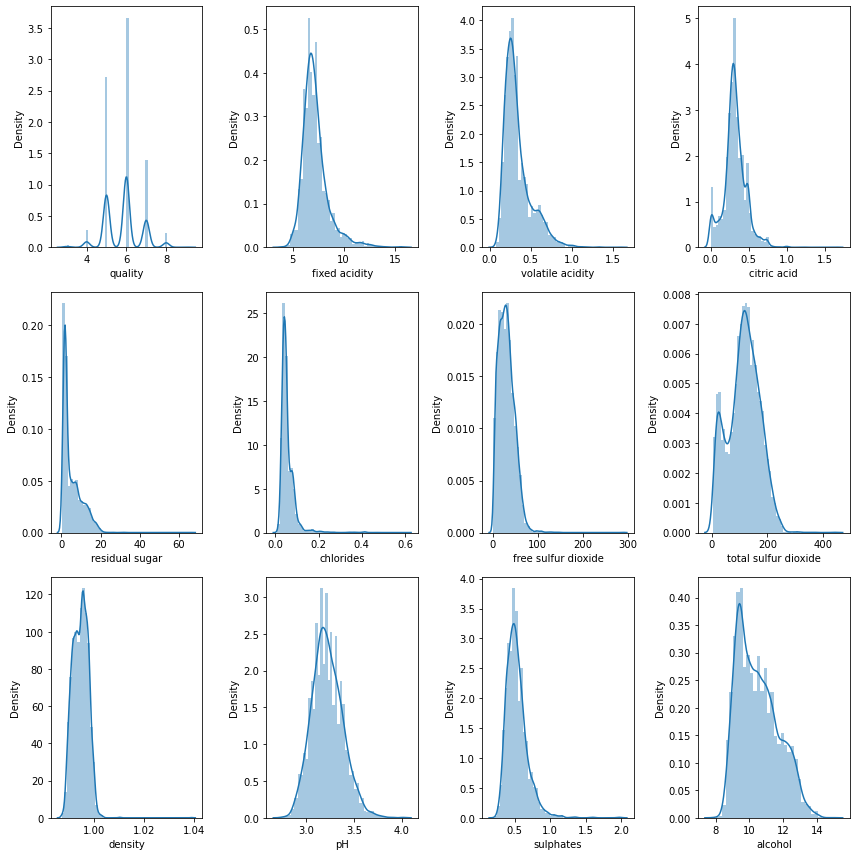

In [8]:
#train의 각 변수별 분포를 살펴본다.
plt.figure(figsize=(12,12))
#subplot은 여러 개의 그림을 한번에 나타내는 것.
#distplot은 분포도 그리는 것.
for i in range(1, 13):
    plt.subplot(3,4,i)
    sns.distplot(train.iloc[:,i])
plt.tight_layout() #간격 유지 하기
plt.show()

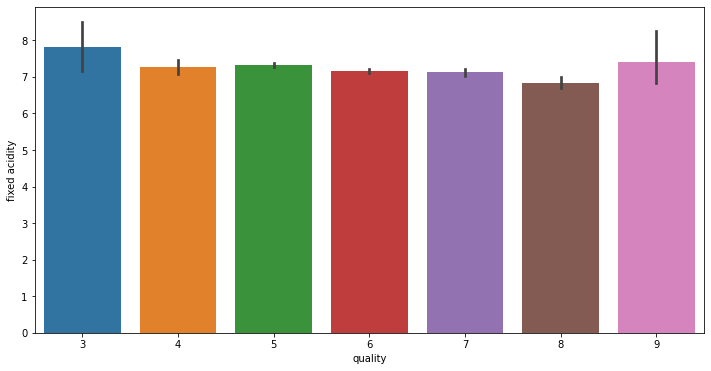

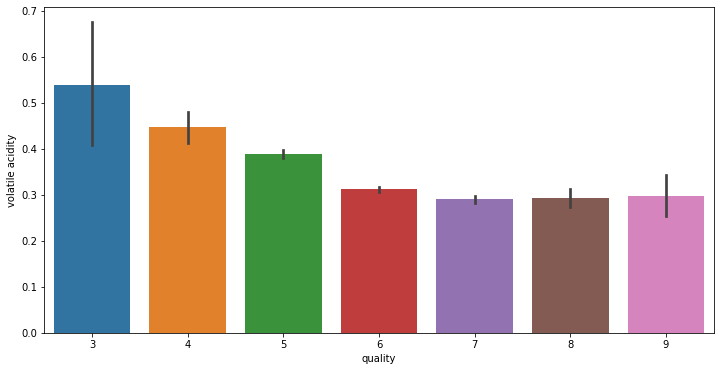

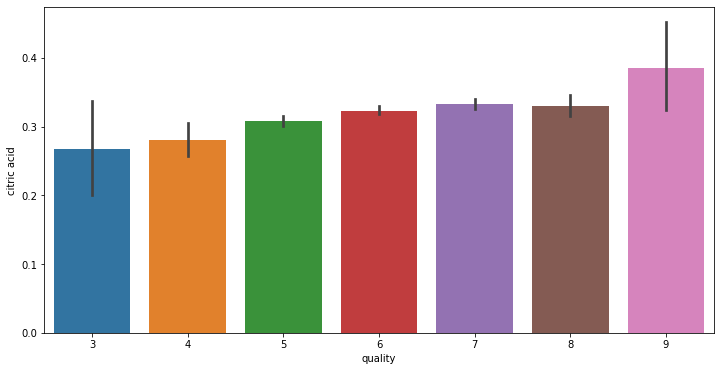

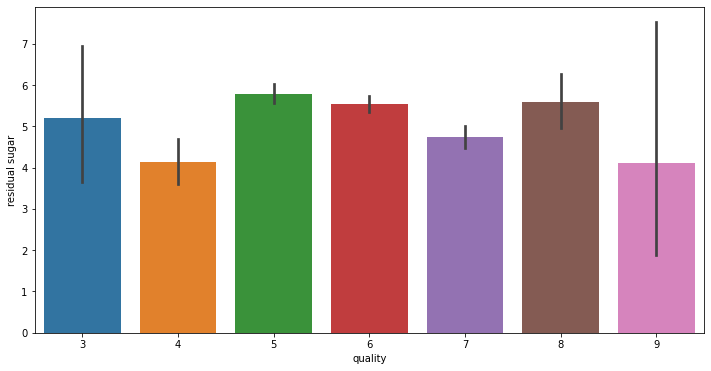

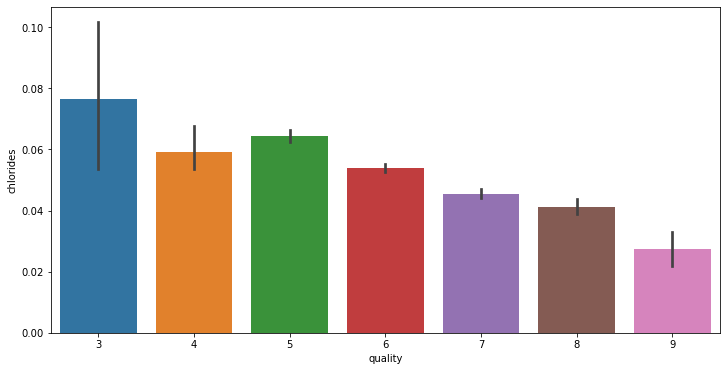

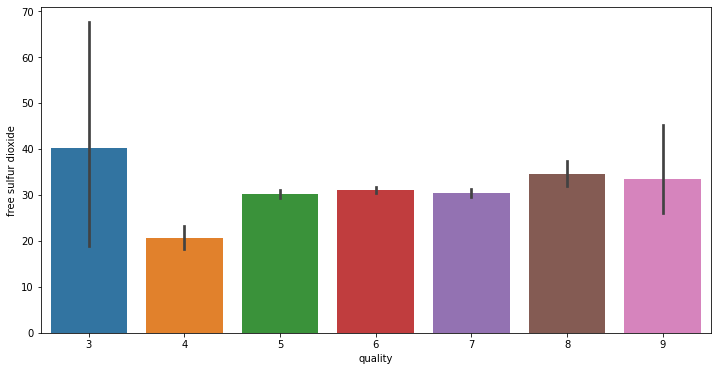

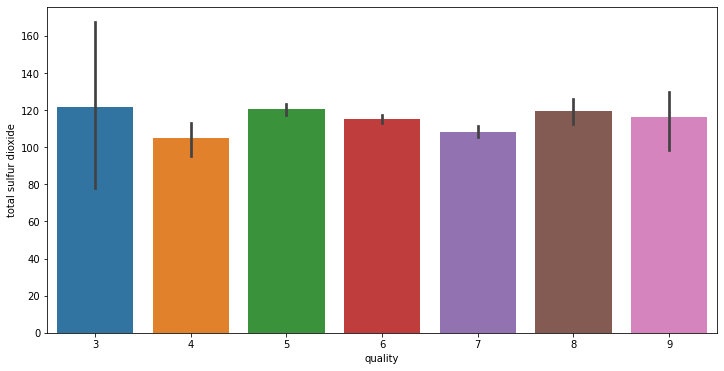

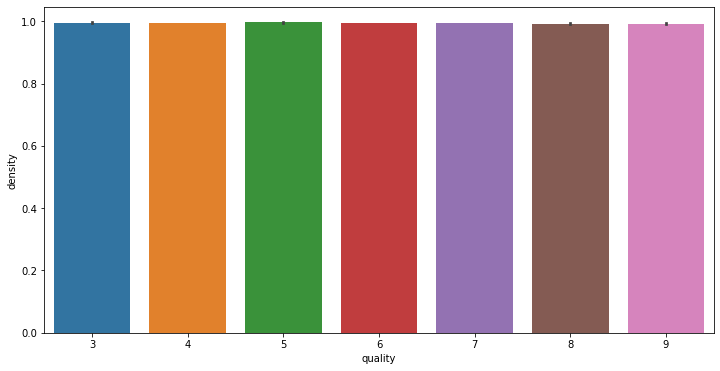

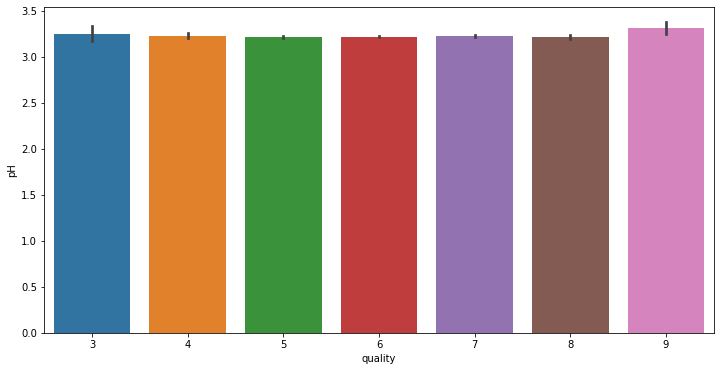

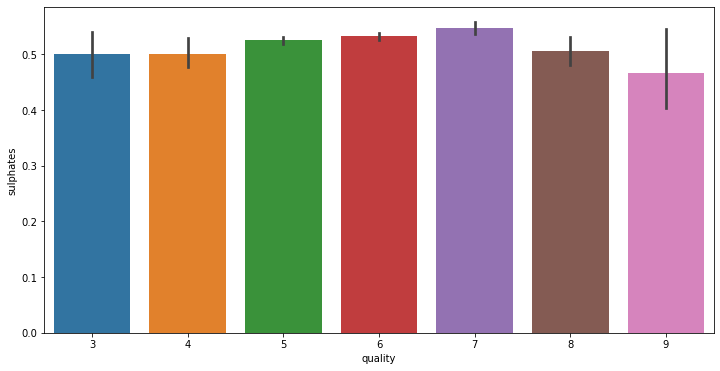

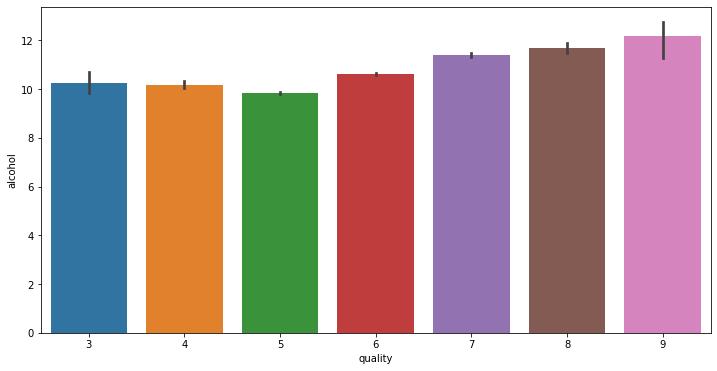

In [9]:
#train에서 각 변수와 quality 변수 사이 분포를 확인
for i in range(11):
    fig = plt.figure(figsize = (12,6))
    #index랑 quailty 항 분리하기 위한 테크닉
    sns.barplot(x= "quality", y=train.columns[i+2], data=train) 

# 데이터 전처리

In [10]:
#type에는 white와 red 두 종류가 있다. 각각 0, 1로 변환한다.
from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()
enc.fit(train['type'])
train['type'] = enc.transform(train['type'])
test['type'] = enc.transform(test['type'])

In [11]:
train.head()

,index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,0,5,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,1
1,1,5,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,0
2,2,5,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,1
3,3,6,7.0,0.210,0.31,6.0,0.046,29.0,108.0,0.99390,3.26,0.50,10.8,1
4,4,6,7.8,0.400,0.26,9.5,0.059,32.0,178.0,0.99550,3.04,0.43,10.9,1


In [12]:
# 불필요한 변수 제거 및 모델에 입력하기 전 데이터를 정형화한다.
train_x = train.drop(['index', 'quality'], axis = 1) #axis = 1은 열 기준을 뜻함
train_y = train['quality']
test_x = test.drop('index', axis = 1)

In [13]:
train_x.shape, train_y.shape, test_x.shape

((5497, 12), (5497,), (1000, 12))

In [14]:
train_x.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,1
1,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,0
2,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,1
3,7.0,0.210,0.31,6.0,0.046,29.0,108.0,0.99390,3.26,0.50,10.8,1
4,7.8,0.400,0.26,9.5,0.059,32.0,178.0,0.99550,3.04,0.43,10.9,1


In [15]:
train_y.head()

0    5
1    5
2    5
3    6
4    6
Name: quality, dtype: int64

In [16]:
test_x.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,9.0,0.31,0.48,6.6,0.043,11.0,73.0,0.99380,2.90,0.38,11.6,1
1,13.3,0.43,0.58,1.9,0.070,15.0,40.0,1.00040,3.06,0.49,9.0,0
2,6.5,0.28,0.27,5.2,0.040,44.0,179.0,0.99480,3.19,0.69,9.4,1
3,7.2,0.15,0.39,1.8,0.043,21.0,159.0,0.99480,3.52,0.47,10.0,1
4,6.8,0.26,0.26,2.0,0.019,23.5,72.0,0.99041,3.16,0.47,11.8,1


# 모델링

In [17]:
from sklearn.ensemble import RandomForestClassifier
# 모델 선언
model = RandomForestClassifier()

#모델 학습
model.fit(train_x, train_y)

RandomForestClassifier()

In [18]:
# 학습된 모델로 test 데이터 예측
y_pred = model.predict(test_x)

In [19]:
submission = pd.read_csv('sample_submission.csv')

In [20]:
submission['quality'] = y_pred

In [21]:
submission

,index,quality
0,0,5
1,1,5
2,2,6
3,3,5
4,4,6
...,...,...
995,995,6
996,996,6
997,997,5
998,998,6


In [22]:
submission.to_csv('baseline.csv', index=False)